In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
df = pd.read_csv('train.csv')

In [27]:
print(df.shape)

(614, 13)


In [3]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
print( df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [6]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
df.duplicated().sum()

0

In [28]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

In [29]:
df.drop('Loan_ID', axis=1, inplace=True, errors='ignore')

In [14]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


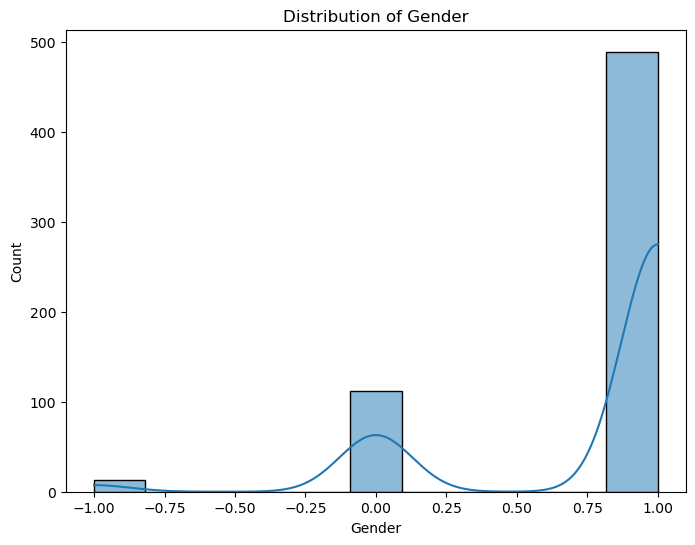

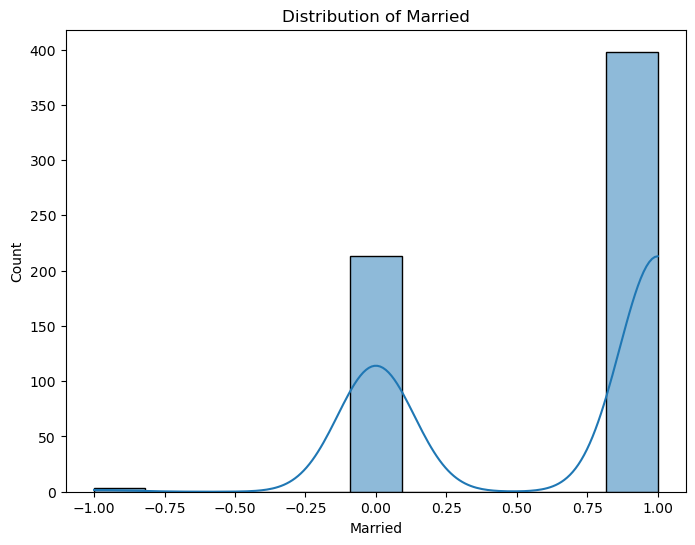

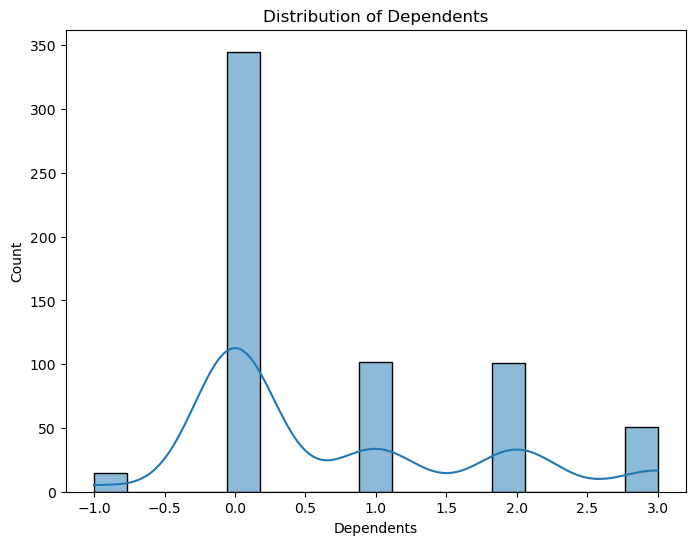

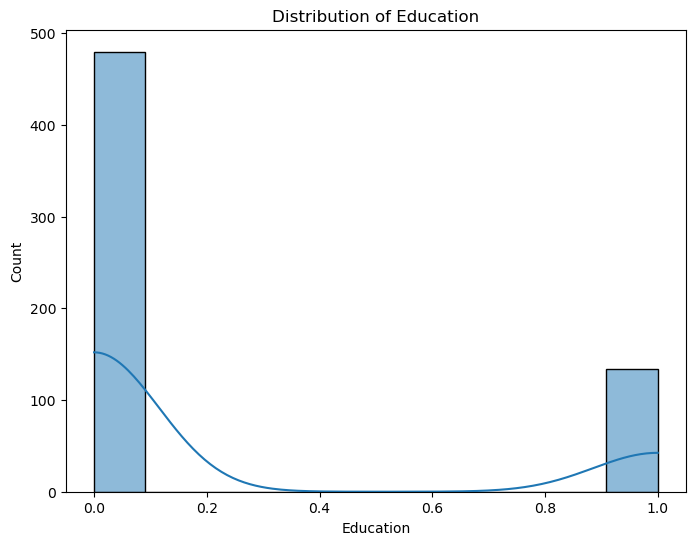

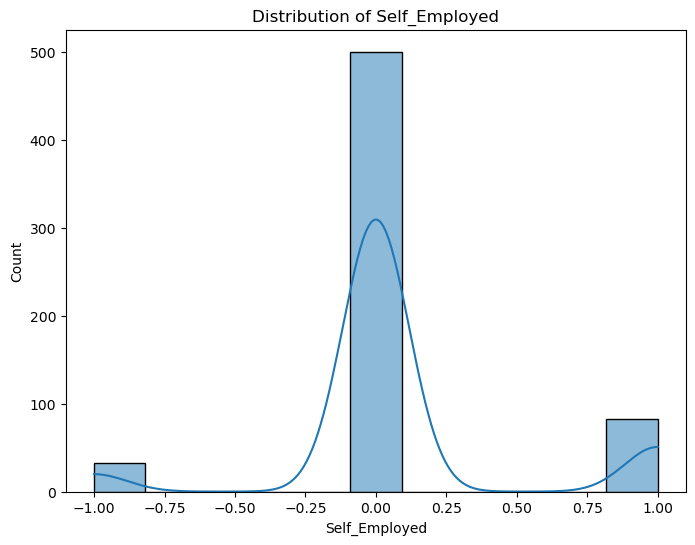

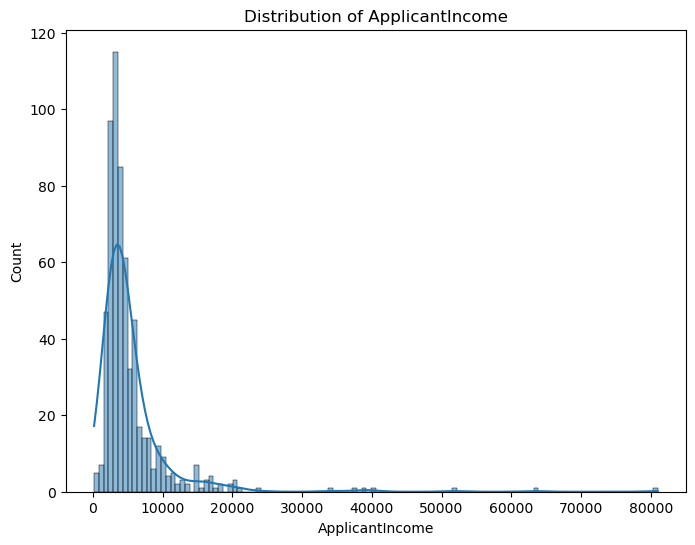

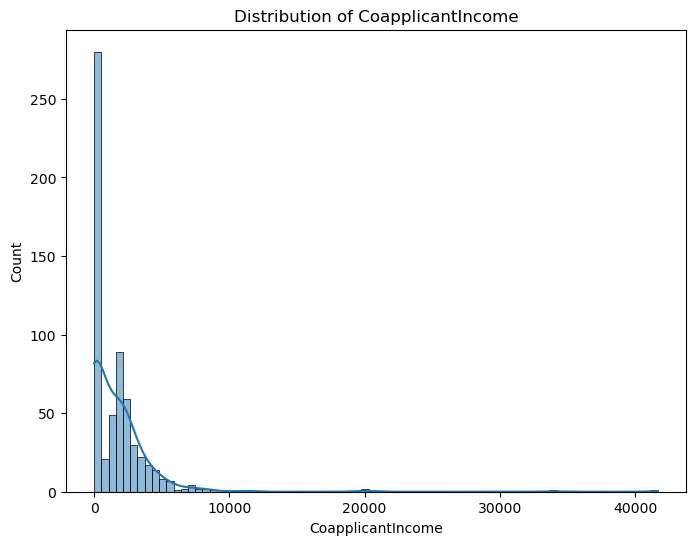

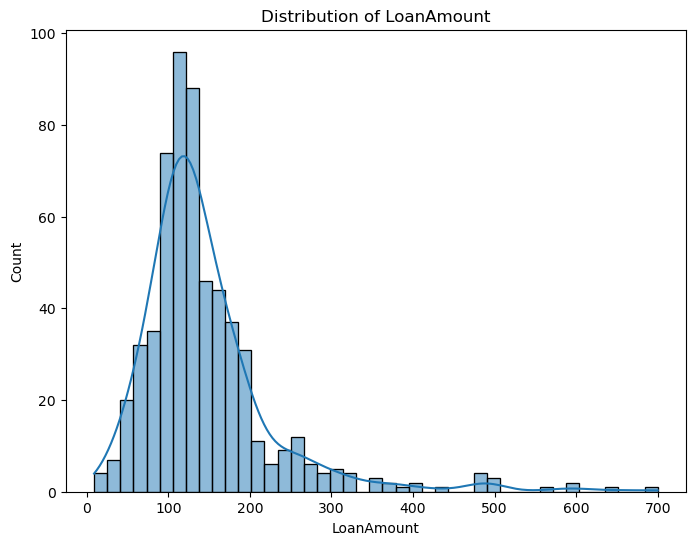

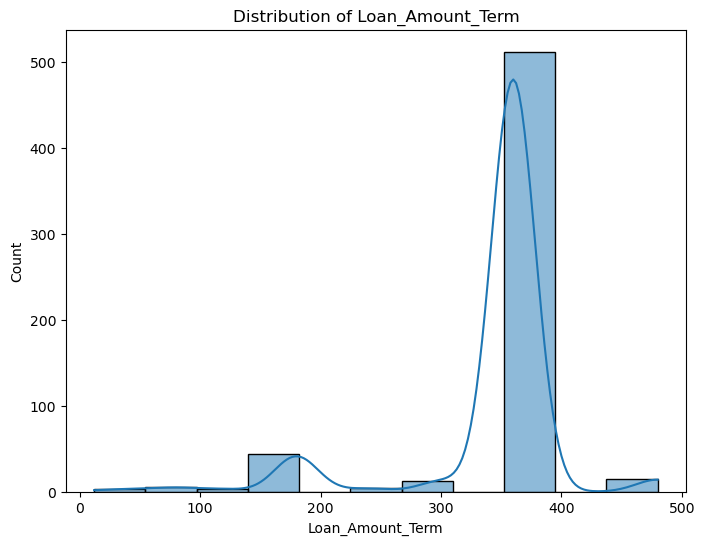

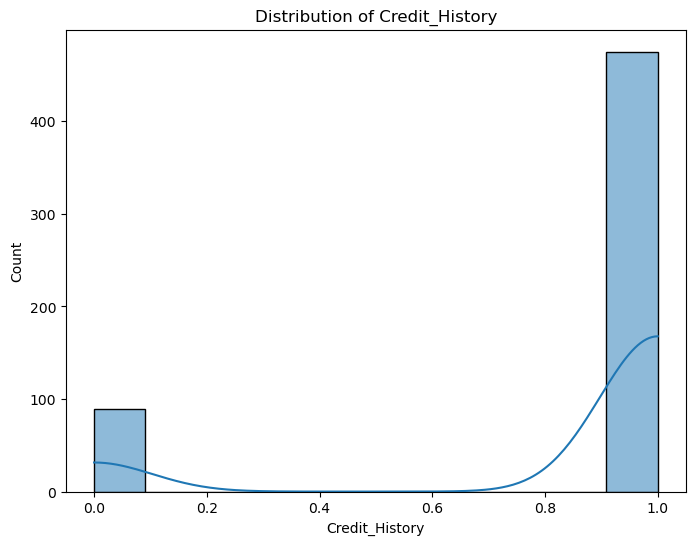

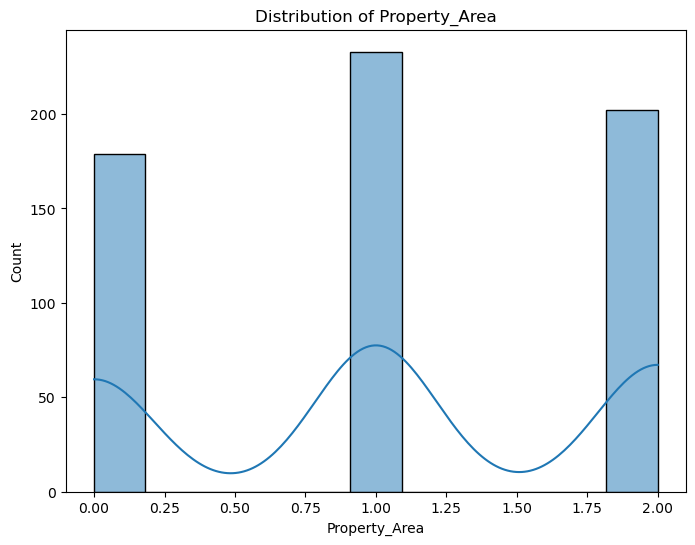

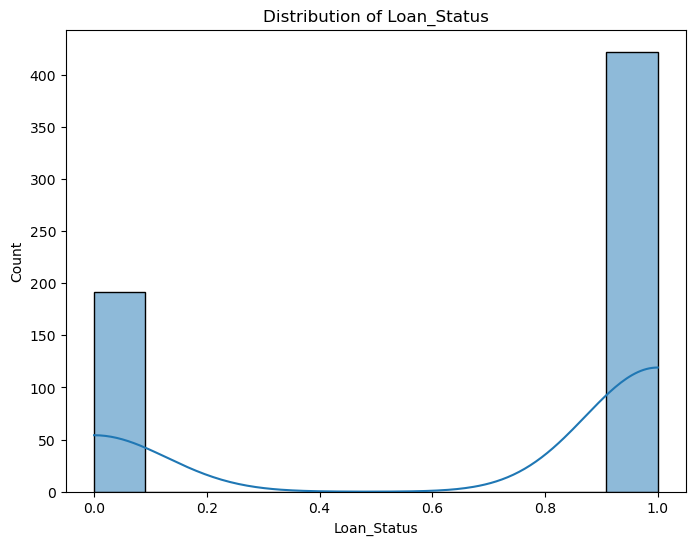

In [30]:
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.277459    0.109018   0.068774      -0.031116   
Married            0.277459  1.000000    0.345269   0.022530       0.030171   
Dependents         0.109018  0.345269    1.000000   0.051414       0.048221   
Education          0.068774  0.022530    0.051414   1.000000       0.000820   
Self_Employed     -0.031116  0.030171    0.048221   0.000820       1.000000   
ApplicantIncome   -0.024689  0.047691    0.115686  -0.140760       0.092967   
CoapplicantIncome  0.073642  0.083270    0.033955  -0.062290      -0.052384   
LoanAmount         0.020731  0.141920    0.163360  -0.168759       0.082048   
Loan_Amount_Term  -0.060198 -0.103662   -0.105889  -0.073928      -0.017729   
Credit_History     0.029789  0.002419   -0.026431  -0.073658      -0.041027   
Property_Area     -0.008142 -0.003370   -0.009085  -0.065243      -0.028730   
Loan_Status        0.029040  0.075547    0.014263  -

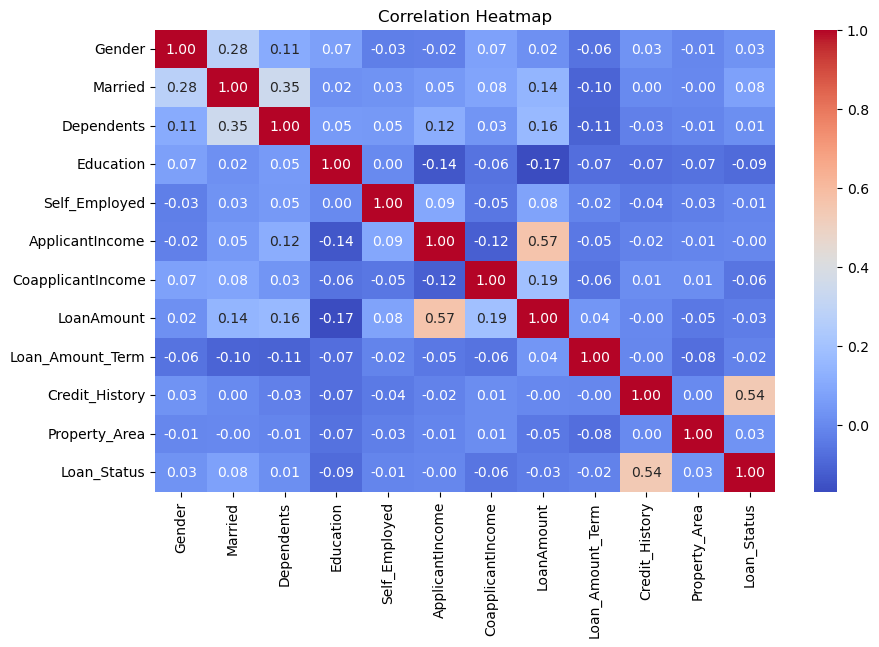

In [44]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [45]:
X = df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred = model.predict(X_test_scaled)
y_pred_proba=model.predict_proba(X_test_scaled)[:,1]
y_pred_proba

array([0.82015438, 0.85086695, 0.85186176, 0.77590479, 0.78532703,
       0.84684358, 0.88073516, 0.89085648, 0.80946692, 0.87979542,
       0.14456985, 0.8167877 , 0.86110283, 0.80476436, 0.89265154,
       0.85019736, 0.80546616, 0.71840705, 0.85294363, 0.85155348,
       0.85834453, 0.82897391, 0.61958586, 0.84591288, 0.82799323,
       0.67878741, 0.77904404, 0.76440772, 0.75376802, 0.88780323,
       0.89756377, 0.83800229, 0.76984948, 0.76498738, 0.6923742 ,
       0.06380438, 0.83648188, 0.89940725, 0.88026349, 0.87783891,
       0.77718444, 0.81166995, 0.85812641, 0.83091091, 0.7856769 ,
       0.83203195, 0.82211184, 0.12478153, 0.09725837, 0.07712304,
       0.69520438, 0.73391062, 0.08699353, 0.69003331, 0.83379196,
       0.8220866 , 0.72017968, 0.86263927, 0.10834376, 0.85956071,
       0.05202208, 0.82584939, 0.14687317, 0.80049559, 0.88586205,
       0.77784244, 0.77744987, 0.86977205, 0.90571498, 0.7992403 ,
       0.06216744, 0.86839313, 0.82112353, 0.84009671, 0.12112

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nModel Evaluation:")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1score:",f1_score(y_test,y_pred))


Model Evaluation:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1score: 0.8586956521739131


Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



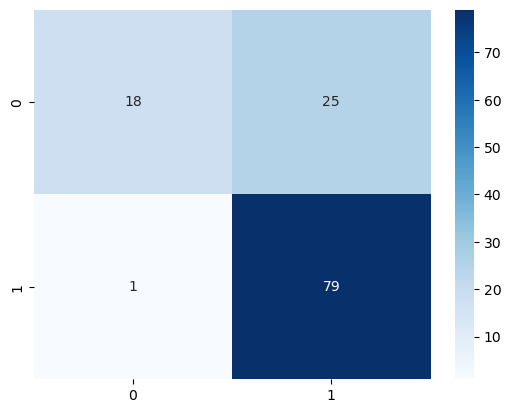

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()